# MACHINE LEARNING INTERN @ CODE ALPHA

### AUTHOR : PARVEJ ALAM M. ANSARI

## TASK 3: AUTOMATED ESSAY SCORING

### The dataset is available at Kaggle:
### https://www.kaggle.com/competitions/mum-fit1043-s1-2021/data

# Introduction

The purpose of this report is to read and preprocess data derived from a set of essays, then conduct predictive analysis on this data using machine learning, and finally to evaluate the accuracy of the predictions. The dataset consists of numeric information on a set of student-written essays and with this information the goal is to create an appropriate machine learning model to perform automated essay scoring.

The report has the following outline:
1. Introduction
2. Downloading and Importing Libraries
3. Reading and Describing the Data
4. Supervised Learning
5. Feature Selection
6. Splitting Data into Train/Test Set
7. Classification
8. Normalization/Standardization
8. SVM
10. Model Evaluation

# Downloading and Importing Libraries

### &emsp;Downloading Libraries

The first step is to download the libraries that are used in this report.

Here, there is only one library to download and it is *imbalanced-learn* which is an open-source library that provides tools to aid in classification when there are imbalanced classes.

### &emsp;Importing Libraries

After downloading the required libraries, we need to import the necessary libraries and modules:
1. **pandas**, which is an open source data analysis tool for python. It allows the usage of convenient data structures such as ***DataFrame*** along with a collection of functions that will greatly aid in reading files and manipulating DataFrames. We can also use the *as* keyword to specify a simpler, and shorter name - *pd* to refer to the library from this point onwards.
2. **numpy**, which is an open source python library that is very useful when working with arrays and matrices. It also provides a large collection of mathematical functions to operate on these arrays. Here we use the *as* keyword to specify a simpler, and shorter name - *np* to refer to the library from this point onwards.
3. **sklearn**, also known as scikit-learn is an open-source machine learning library for python. It provides easy-to-use tools for predictive data analysis and features a vast range of classification, regression, and clustering algorithms. Here we are importing the various modules in the library instead of just importing the library for ease of use.
4. **imblearn**, also known as imbalanced-learn, is an open-source library that can improve accuracy of classification algorithms when there are imbalanced classes
5. **collections** is a built-in python module which implements specialized container datatypes but here we are only using the Counter class from this module that is used for counting hashable objects.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from collections import Counter

# Reading and Describing the Data

### &emsp;Reading Files

Read the data from the *'essay_features.csv'* file with the *.read_csv* function from pandas and assign the resulting DataFrame to the *essay_data* variable

In [2]:
essay_data = pd.read_csv('/content/sample_data/essay_features.csv')

#### &emsp;&emsp;Ensuring the data was read correctly

To ensure that the file has been read properly, we can first check whether the resulting DataFrame has the same number of rows and columns as the original csv file

In [3]:
essay_data.shape

(1332, 19)

The output shows that there are 1332 rows and 19 columns. Comparing this with the original csv file, which also has 1332 rows (excluding the first row which is used as a header and is thus not counted as a row in the DataFrame) and 19 columns, we can see that the resulting DataFrame has the same number of rows and columns as the original file.

Next we can display the first and last 5 rows of the *essay_data* DataFrame to check whether the contents of the cells have been read properly

In [4]:
essay_data.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


In [5]:
essay_data.tail()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
1327,1151,2404,467,16,10,0,5.147752,22,0,21.227273,462.987069,0.991407,200,0.428266,113,0.241970,529,519,4
1328,1015,1182,241,0,14,0,4.904564,16,0,15.062500,238.655462,0.990272,94,0.390041,67,0.278008,293,283,3
1329,1345,1814,363,5,11,0,4.997245,13,3,27.923077,362.329640,0.998153,170,0.468320,107,0.294766,427,415,3
1330,344,1427,287,5,8,0,4.972125,13,1,22.076923,284.657277,0.991837,144,0.501742,83,0.289199,323,312,3
1331,1077,2806,542,24,6,0,5.177122,22,3,24.636364,538.988889,0.994444,284,0.523985,155,0.285978,596,575,4


With this we can be certain that the data has been read properly

### &emsp;Describing the Data

All of the column values are numeric, however, note that the last column (*score*) is numeric, discrete, *and* categorical. This is because it can only take one of 6 discrete values (1, 2, 3, 4, 5, or 6).

***Central tendency:***
- **essayid**
    - *Note that this column contains the unique ids of the essays and has no bearing on the content of the essay itself, thus these statistical descriptions might not be particularly meaningful or useful*
    - The average essay id is 905
    - The median essay id is 915
- **chars**
    - The average number of characters in an essay is 2102
    - The median number of characters in an essay is 2030
- **words**
    - The average number of words in an essay is 424
    - The median number of words in an essay is 411
- **commas**
    - The average number of commas in an essay is 15
    - The median number of commas in an essay is 13
- **apostrophes**
    - The average number of apostrophes in an essay is 8.1
    - The median number of apostrophes in an essay is 6.0
- **punctuations**
    - *Note that punctuations here excludes commas, apostrophes, period, question marks*
    - The average number of punctuations in an essay is 0.5
    - The median number of punctuations in an essay is 0.0
- **avg_word_length**
    - The average number of characters in a word in an essay is 4.9
    - The median number of characters in a word in an essay is also 4.9
- **sentences**
    - The average number of sentences in an essay is 20
    - The median number of sentences in an essay is 18
- **questions**
    - The average number of questions in an essay is 1.2
    - The median number of questions in an essay is 1.0
- **avg_word_sentence**
    - The average number of words per sentence in an essay is 24
    - The median number of words per sentence in an essay is 22
- **POS**
    - *Total number of Part-of-Speech discovered in the essay. This means the number of words that have similar grammatical properties*
    - The average number of Part-of-Speech discovered in an essay is 421
    - The median number of Part-of-Speech discovered in an essay is 407
- **POS/total_words**
    - The average ratio of Part-of-Speech discovered to the total number of words in an essay is 1.0
    - The median ratio of Part-of-Speech discovered to the total number of words in an essay is also 1.0
- **prompt_words**
    - The average number of words related to the prompt in an essay is 199
    - The median number of words related to the prompt in an essay is 193
- **prompt_words/total_words**
    - The average ratio of the number of words related to the prompt to the total number of words in an essay is 0.5
    - The median ratio of the number of words related to the prompt to the total number of words in an essay is also 0.5
- **synonym_words**
    - The average number of synonymous words in an essay is 110
    - The median number of synonymous words in an essay is 108
- **synonym_words/total_words**
    - The average ratio of the number of synonymous words to the total number of words in an essay is 0.3
    - The median ratio of the number of synonymous words to the total number of words in an essay is also 0.3
- **unstemmed**
    - *Unstemmed words refers to words that cannot be further reduced to their base forms*
    - The average number of unstemmed words in an essay is 469
    - The median number of unstemmed words in an essay is 463
- **stemmed**
    - *Stemmed words refers to words that **can** be further reduced to their base forms*
    - The average number of stemmed words in an essay is 456
    - The median number of stemmed words in an essay is 448
- **score**
    - The average rating of an essay is 3.4
    - The median rating of an essay is 3.0
    
***Variability***:

*Range can be calculated by subtracting the smallest value in a column from the largest value in a column (max - min)*
- **essayid**
    - There is a large range of 1799 between the maximum and minimum essay ids
    - The variance in the essay id between essays is 277400
- **chars**
    - There is a large range of 5973 between the essay with the most characters and the essay with the least number of characters
    - The variance in the number of characters between essay is 749893
- **words**
    - There is a large range of 1134 between the essay with the most words and the essay with the least number of words
    - The variance in the number of words between essays is 29541
- **commas**
    - There is a very large range of 72 between the essay with the most commas and the essay with the least number of commas
    - The variance in the number of commas between essays is 119
- **apostrophes**
    - There is a large range of 49 between the essay with the most apostrophes and the essay with the least number of apostrophes
    - The variance in the number of apostrophes between essays is 37.5
- **punctuations**
    - There is a very large range of 26 (seeing as the mean is only 0.5) between the essay with the most punctuations and the essay with the least number of punctuations
    - The variance in the number of punctuations between essays is 1.6
- **avg_word_length**
    - There is a relatively small range of 3.5 between the essay with the highest average word length and the essay with the lowest average word length
    - The variance in the average word length between essays is 0.053
- **sentences**
    - There is a very large range of 642 between the essay with the most number of sentences and the essay with the least number of sentences
    - The variance in the number of sentences between essays is 369
- **questions**
    - There is a large range of 17 (seeing as the mean is 1.2) between the essay with the most number of questions and the essay with the least number of questions
    - The variance in the number of questions between essays is 3.4
- **avg_word_sentence**
    - There is a very large range of 302 between the essay with the highest average number of words per sentence and the essay with the lowest average number of words per sentence
    - The variance in the number of average words per sentence between essays is 124.5
- **POS**
    - There is a very large range of 1123 between the essay with the most number of POS discovered and the essay with the least number of POS discovered
    - The variance in the number of Part-Of-Speech between essays is 29236
- **POS/total_words**
    - There is a very small range of 0.08 between the essay with the highest number of Part-Of-Speech discovered per total words and the essay with the lowest number of Part-Of-Speech discovered per total words
    - The variance in the number of Part-Of-Speech per total number of words between essays is 5.3e-5
- **prompt_words**
    - There is a large range of 655 between the essay with the most number of prompt words and the essay with the least number of prompt words
    - The variance in the number of words related to the prompt between essays is 6844
- **prompt_words/total_words**
    - There is a range of 0.67 between the essay with the highest proportion of prompt words to total words and the essay with the lowest proportion of prompt words to total words
    - The variance in the ratio of words related to the prompt to the total number of words between essays is 2.8e-3
- **synonym_words**
    - There is a range of 344 between the essay with the highest number of synonymous words and the essay with the lowest number of synonymous words
    - The variance in the number of synonymous words between essays is 1933
- **synonym_words/total_words**
    - There is a relatively large range of 0.4 between the essay with the highest proportion of synonymous words to total words and the essay with the lowest proportion of synonymous words to total words
    - The variance in the ratio of synonymous words to the total number of words between essays is 1.5e-3
- **unstemmed**
    - There is a large range of 702 between the essay with the highest number of unstemmed words and the essay with the lowest number of unstemmed words
    - The variance in the number of unstemmed words (words that were not reduced further to their base form) between essays is 25423
- **stemmed**
    - There is a large range of 700 between the maximum and minimum number of stemmed words (words that have been reduced further to their base form) in an essay
    - The variance in the number of stemmed words (words that have been reduced further to their base form) between essays is 24258
- **score**
    - There is a range of 5 between the maximum and minimum score of an essay, which makes sense since the possible scores are 1, 2, 3, 4, 5, or 6
    - The variance in the score between essays is 0.6

In [6]:
# Generate descriptive statistics for the essay_data DataFrame
essay_data.describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000
mean,905.27027,2101.745495,424.485736,14.667417,8.141141,0.47973,4.939762,19.704204,1.222973,23.884687,420.596542,0.989935,198.913664,0.469164,110.16967,0.263846,468.987988,455.507508,3.427177
std,526.68760,865.963750,171.873730,10.920781,6.124520,1.27168,0.231071,19.202731,1.847446,11.160020,170.985111,0.007308,82.729266,0.052466,43.96192,0.038870,159.447449,155.751220,0.774275
min,0.00000,169.000000,36.000000,0.000000,2.000000,0.00000,2.231322,0.000000,0.000000,1.084112,35.647059,0.924771,14.000000,0.288889,11.00000,0.027299,48.000000,50.000000,1.000000
25%,442.75000,1527.250000,310.000000,7.000000,4.000000,0.00000,4.791679,13.000000,0.000000,19.142857,305.406284,0.987758,144.000000,0.435709,81.00000,0.238423,361.000000,350.750000,3.000000
50%,914.50000,2029.500000,411.000000,13.000000,6.000000,0.00000,4.946059,18.000000,1.000000,22.030331,406.982869,0.991572,193.000000,0.465852,107.50000,0.262872,463.000000,448.000000,3.000000
75%,1369.75000,2613.500000,525.000000,21.000000,11.000000,0.00000,5.092938,24.000000,2.000000,26.048234,520.739458,0.994425,246.000000,0.500000,134.00000,0.288277,581.000000,561.250000,4.000000
max,1799.00000,6142.000000,1170.000000,72.000000,51.000000,26.00000,5.681429,642.000000,17.000000,303.000000,1158.984563,1.000000,669.000000,0.961207,355.00000,0.465517,750.000000,750.000000,6.000000


In [7]:
# display the variance for each column
essay_data.var()

,0
essayid,277399.827726
chars,749893.216171
words,29540.579060
commas,119.263460
apostrophes,37.509741
punctuations,1.617170
avg_word_length,0.053394
sentences,368.744896
questions,3.413056
avg_word_sentence,124.546047


# Supervised Learning

### &emsp;Explanation

**Supervised Machine Learning** is a subcategory of machine learning which involves training an algorithm on data that is well labeled, i.e. labeled training data. The goal is to obtain an approximation of the function that maps the input to the output so that when it is provided with new input data, it is able to predict the output for that data (IBM Cloud Education, 2020; Brownlee, 2020).

In the context of machine learning, **labeled data** refers to data that has one or more meaningful labels or informative tags that can be used by supervised machine learning models to learn the combination of features that might map the input to that label, and thus be able to predict labels for unlabelled data. For example, given a picture the label might indicate whether the picture contains a cat or not (Amazon Web Services, n.d.).

In machine learning, the original dataset is usually divided into the **training set** and the **test set**, with the training set typically many times larger than the test set (usually an 80/20 split), where the training set is a subset of the dataset that is used to train a model, i.e. it is a set of examples used to fit the parameters/weights of a model, and the test set is a subset of the dataset that is not used during training and is instead used to test the performance of the trained model (Google Developers, 2020). Splitting the dataset in this way is required to avoid overfitting where the model performs very well with the provided data but performs very poorly when given new data, in this sense the test set serves as a proxy for new data.

### &emsp;Separating Features and Label

By looking at the dataset, we can surmise that the label, i.e. what we want the model to predict, are the **scores** which represents the grade of the essay, therefore we can obtain the data labels by extracting the values from the *score* column.

Here we extract the values from the last column (*score*), and assign them to the variable *label* to be used later on during preprocessing and training.

In [8]:
# extract values from every row, last column
label = essay_data.iloc[:,-1].values

Here we extract the values from the first column (*essayid*) to the second last column (*stemmed*) and assign these values to the variable *features* to be used during preprocessing and training.

In [9]:
# extract values from every row, from first to second last column (i.e. columns index 0 to 17)
features = essay_data.iloc[:,:-1].values

# Feature Selection

Before splitting the data into the training set and the test set, we can perform feature selection to identify and select the features that will contribute most to the model's prediction. This is done to increase the model's accuracy, decrease training time, and reduce overfitting.

To do this we can make use of the *f_classif()* function from the *sklearn.feature_selection* module that computes the ANOVA F-value for the provided sample and allows for feature selection when we are working with a classification problem, more specifically, when we have numerical input data (features) and a categorical target variable (label) as we do in this case.

Here we can print out the F-value for each of the (feature) columns to determine which columns to keep, the higher the score the more relevant the column.

In [10]:
# the f_classif() function takes in the features and label data and returns the F-values for each feature
F_vals, _ = f_classif(features, label)

# gets the list of (feature) column names
cols = essay_data.columns[:-1]
# sort based on the F-values in descending order
ind = np.lexsort((cols,F_vals))[::-1]

print("----List of features from highest to lowest F-value----\n")
# for each feature, display the column (feature) name along with its F-value
for index in ind:
    print("{} = {}".format(cols[index], F_vals[index]))

----List of features from highest to lowest F-value----

unstemmed = 255.8948587663438
stemmed = 254.33217075322452
chars = 236.13263126536944
POS = 209.80140389791052
words = 208.92684234127228
prompt_words = 186.39330700069752
synonym_words = 135.72391926093715
commas = 106.40189465413823
POS/total_words = 33.979754886876925
apostrophes = 33.93409241646121
questions = 32.777162227254095
avg_word_length = 32.4444185987326
synonym_words/total_words = 28.505876406086006
sentences = 15.93339650670346
punctuations = 7.439281205003285
avg_word_sentence = 5.065326414935797
prompt_words/total_words = 1.892359146703505
essayid = 1.1098589592655128


Now we can select the features which are relevant in predicting the essay's grade by defining a threshold of, say, 100 to extract the features that are most important. From the list above we can see that there are 8 features with an F-value above 100: *unstemmed, stemmed, chars, POS, words, prompt_words, synonym_words, commas*.

We can now extract these 8 features and from this point onwards we will only be working and training with the selected features.

In [11]:
# specify the column headers of the features we want to keep
selected_cols = ['unstemmed', 'stemmed', 'chars', 'POS', 'words', 'prompt_words', 'synonym_words', 'commas']
# extract the values only from the selected columns
selected_features = essay_data[selected_cols].values

# Splitting Data into Training and Test Set

<br></br>
After feature selection, we can now split the data into the training set and the test set by using the *train_test_split()* function from the *sklearn.model_selection* module. Typically the ratio of the size of the training set to the size of the test set is 80:20 so here we will follow this convention. This function returns four arrays listed below in order:
- **X_train** : an array of values which represents the feature values for examples which are going to be used to train the model (part of the training set)
- **X_test** : an array of values which represents the feature values for examples which are going to be used to test the accuracy of the model after it has been trained (part of the test set)
- **y_train** : an array of values which represents the label values for examples which are going to be used to train the model (part of the training set)
- **y_test** : an array of values which represents the label values for examples which are going to be used to test the accuracy of the model after it has been trained by comparing it to the model's predictions (part of the test set)

In [12]:
# first parameter is the (selected) feature values
# second parameter is the label values
# test_size parameter takes a float between 0 and 1, which represents the proportion of the test set to the entire dataset
# random_state parameter takes in an int so that the output is reproducible
X_train, X_test, y_train, y_test = train_test_split(selected_features, label, test_size=0.2, random_state=42)

We can check that the split was done correctly by printing the shape of X_train, the shape of X_test, and the proportion of data in the training set to the entire dataset

In [13]:
train_rows, train_cols = X_train.shape
test_rows, test_cols = X_test.shape
print("X_train has {} rows and {} columns".format(train_rows, train_cols))
print("X_test has {} rows and {} columns".format(test_rows, test_cols))
print("proportion of data in the X_test to the entire dataset:", test_rows/essay_data.shape[0])

X_train has 1065 rows and 8 columns
X_test has 267 rows and 8 columns
proportion of data in the X_test to the entire dataset: 0.20045045045045046


# Classification

### &emsp;Difference between binary and multi-class classification

Classification refers to a predictive modeling problem that involves predicting a class label for some input data. Two of the most common types of these problems are binary and multi-class classification.

In binary classification, there are only two class labels, therefore given some input data the model has to predict whether it is of some class X or not. For example, given an image the model has to predict whether it is a cat or not. It only requires one classifier model. (Band, 2020)

Whereas in multi-class classification, there are multiple class labels, therefore, given some input data the model has to assign it to one of these labels. It might require more than one classifier model (Band, 2020). Since we have determined that the *score* column contains values that are categorical, and because there is more than two possible labels (scores can be one of [1,2,3,4,5,6]), in this case, predicting the score for an essay is an example of a multi-class classification problem.

# Normalization/Scaling

Normalization/Scaling is an important step in preprocessing as it changes the values in the numeric columns to a common scale while keeping the relative differences in the range of values (Jaitley, 2018). This is especially important when different features have vastly different ranges. For example, the *chars* column contains very large values when compared to the values in the *punctuations* column. The values in the *chars* column might then have a greater influence over the result due to its larger magnitude even though it might not necessarily be a better predictor than the values in the *punctuations* column. Therefore by normalizing the range of all features we can avoid this problem.

Since we are working with features that have very different ranges (for example *chars* and *punctuations*) and we are planning to use an SVM, which assumes that the data provided is in a standard range, therefore normalization/scaling is required.

Here we can use the *MinMaxScaler()* function from the *sklearn.preprocessing* module to scale each feature to the range [0,1]. Not only does the MinMaxScaler preserve the shape of the original distribution, it also avoids significantly altering the information embedded in the original data (Hale, 2019).

In [14]:
# define the scaler we are going to use as the MinMaxScaler
# we are going to scale the features to the default range of [0,1] since we have no negative values
scaler = MinMaxScaler()

# fit the scaler to the training data which computes the minimum and maximum of every feature in X_train
# then we transform X_train to scale the data according to the computed minimum and maximum
X_train = scaler.fit_transform(X_train)
# Here we transform X_test using the minimum and maximum of the corresponding features in X_train
X_test = scaler.transform(X_test)

We can test this by printing out the maximum and minimum values for every feature in both the training and test sets. Note that while the minimum and maximum values of the features in the training set are 0s and 1s respectively, the minimum and maximum values of the features in the test set are not, with some of the maximum feature values exceeding 1. This is to be expected because the scaler was fitted according to the **training data** not the **test data**, what is important here is that the minimum and maximum feature values for the test set is still very close to the [0,1] range.

In [15]:
print("Minimum values for each feature in the training set:",X_train.min(axis=0))
print("Maximum values for each feature in the training set:", X_train.max(axis=0))
print("Minimum values for each feature in the test set:", X_test.min(axis=0))
print("Maximum values for each feature in the test set:", X_test.max(axis=0))

Minimum values for each feature in the training set: [0. 0. 0. 0. 0. 0. 0. 0.]
Maximum values for each feature in the training set: [1. 1. 1. 1. 1. 1. 1. 1.]
Minimum values for each feature in the test set: [0.01709402 0.01571429 0.00070909 0.00032579 0.0018315  0.
 0.         0.        ]
Maximum values for each feature in the test set: [1.         1.         1.05885481 1.03691839 1.03846154 1.2405303
 1.17006803 0.68055556]


# SVM

### &emsp;SVM in Relation to Linear Regression

Similar to Linear Regression, Support Vector Machines (SVMs) are supervised machine learning models. Whereas linear regression is typically used for regression problems, SVMs can be used for both classification *and* regression tasks (Gandhi, 2018). In regression tasks, the goal of linear regression is to minimize the sum of the squared errors, however the goal of the SVM (SVR) is to instead minimize the l2-norm of the coefficient vector, not the squared error which is instead handled in the constraints. This means that the SVM (SVR) gives us more flexibility as it allows us to ignore errors as long as they fall within an acceptable range/margin (Sharp, 2020).

In classification tasks, the goal of an SVM algorithm is to find the optimal hyperplane that is able to best classify the input data. To this end, many hyperplanes are tested and the plane that has the maximum margin, i.e. the hyperplane that results in the maximum distance between the closest points from separate classes, is chosen (Gandhi, 2018).

### &emsp; Kernels

Kernels or sometimes known as the "kernel trick" allows SVMs to create non-linear decision boundaries. These kernels are mathematical functions which takes input data in n dimensional space, which is not separable using a hyperplane, and transforms them into a higher dimension in which this data *is* separable. The resulting hyperplane can then be projected back down into n dimensional space to get a non-linear decision boundary (Suriya, n.d.). There are a couple of kernels for example linear, polynomial, radial basis function (rbf), and sigmoid but the most commonly used ones are linear and rbf (DataFlair, n.d.).

### &emsp; Building the SVM (Hyperparameter Tuning)

Since I will be using SVM for classification, I will use the *SVC* (Support Vector Classification) class from the *sklearn.svm* module. In order to build a good model, we need to choose optimal parameters for the model. For the *SVC* class, the most important parameters are:
- kernel: the type of kernel to be used in the algorithm
- C: the regularization parameter which tells the algorithm how important misclassified points are
- gamma: the kernel coefficient, it decides the level of influence of a single example

Rather than randomly guessing values for the parameters, we can use the *GridSearchCV* class from the *sklearn.model_selection* module. GridSearchCV allows us to test every combination of the provided values for each of these parameters to find the parameters which result in the highest performing model when it is fitted to the training set.

Here I allowed it to choose between two kernels - *linear* and *rbf*, as they are the most commonly used and reliable kernels, whereas for C and gamma I provided a wider range of values to test with.

*Note that gamma is a parameter that is ignored by linear kernels therefore to reduce search time I only allowed GridSearchCV to test the different gamma values when the kernel being tested is the rbf kernel.*

Running the code block below should only take ~10-30 seconds.

In [16]:
# instantiate the SVC
# provide an integer for random_state so that the output is reproducible
svm = SVC(random_state = 42)

# lists the possible values for the 3 important parameters - kernel, C, and gamma
parameters = [
    {'C' : [0.1, 1, 10, 100, 1000], 'kernel' : ['linear']},
    {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [0.0001, 0.001, 0.01, 0.1, 1, 10], 'kernel' : [ 'rbf']}
]

# in the first parameter the estimator for which we want to test out the parameter combinations is passed in
# In the second parameter, try every combination of parameter values for the provided estimator (svm)
# verbose parameter controls its verbosity, a value of 1 just displays the total number of combinations
opt_svm = GridSearchCV(svm, parameters, verbose=10)

# fit the svm to the training set and try all the parameter combinations to find the best one
opt_svm.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5; 1/35] START C=0.1, kernel=linear.......................................
[CV 1/5; 1/35] END ........C=0.1, kernel=linear;, score=0.582 total time=   0.0s
[CV 2/5; 1/35] START C=0.1, kernel=linear.......................................
[CV 2/5; 1/35] END ........C=0.1, kernel=linear;, score=0.667 total time=   0.0s
[CV 3/5; 1/35] START C=0.1, kernel=linear.......................................
[CV 3/5; 1/35] END ........C=0.1, kernel=linear;, score=0.592 total time=   0.0s
[CV 4/5; 1/35] START C=0.1, kernel=linear.......................................


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 4/5; 1/35] END ........C=0.1, kernel=linear;, score=0.629 total time=   0.0s
[CV 5/5; 1/35] START C=0.1, kernel=linear.......................................
[CV 5/5; 1/35] END ........C=0.1, kernel=linear;, score=0.582 total time=   0.0s
[CV 1/5; 2/35] START C=1, kernel=linear.........................................
[CV 1/5; 2/35] END ..........C=1, kernel=linear;, score=0.671 total time=   0.0s
[CV 2/5; 2/35] START C=1, kernel=linear.........................................
[CV 2/5; 2/35] END ..........C=1, kernel=linear;, score=0.709 total time=   0.0s
[CV 3/5; 2/35] START C=1, kernel=linear.........................................
[CV 3/5; 2/35] END ..........C=1, kernel=linear;, score=0.629 total time=   0.0s
[CV 4/5; 2/35] START C=1, kernel=linear.........................................
[CV 4/5; 2/35] END ..........C=1, kernel=linear;, score=0.671 total time=   0.1s
[CV 5/5; 2/35] START C=1, kernel=linear.........................................
[CV 5/5; 2/35] END .........

GridSearchCV(estimator=SVC(random_state=42),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             verbose=10)

After the model has been fitted to the training set and the best parameters have been chosen, we can see which of the parameter values had the best result by accessing the *best_params_* attribute of GridSearchCV

In [17]:
opt_svm.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

From this we can see that among the provided values for each parameter, a C value of 1000, a gamma of 1, and an rbf kernel performed the best with the given data

### &emsp;Predicting

Now that we have a trained SVM model, we can use it to predict the scores for the essays in the training set. We can do this by calling the *.predict()* function of the trained model and passing in the feature values of the essays in the test set. This results in an array of predicted scores for each of the essays in the test set.

In [18]:
# get the predictions of the essays in the test set
predictions = opt_svm.predict(X_test)

We can look at the predictions by simply printing out the *predictions* array

In [19]:
predictions

array([3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3,
       3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 3, 3, 4, 3, 4, 3, 2, 4, 4, 4,
       4, 3, 3, 2, 4, 3, 4, 3, 4, 4, 4, 2, 4, 3, 4, 4, 4, 3, 5, 4, 3, 5,
       3, 4, 3, 3, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4,
       2, 3, 4, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 2, 4, 3, 3, 4, 4, 3, 4, 3, 3, 4,
       4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 4, 3,
       3, 1, 4, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 4,
       3, 4, 3, 4, 3, 3, 2, 3, 3, 4, 4, 3, 3, 2, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 4, 2, 3,
       3, 3, 4, 3, 4, 3, 3, 3, 3, 2, 3, 4, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4,
       2, 4, 4, 4, 4, 3, 2, 3, 3, 3, 4, 3, 4, 4, 4, 1, 3, 3, 4, 3, 3, 4,
       3, 4, 4])

To confirm that they are valid scores/predictions we can find the minimum and maximum score

In [20]:
print("Minimum score predicted: ", predictions.min())
print("Maximum score predicted: ", predictions.max())

Minimum score predicted:  1
Maximum score predicted:  5


We can see that indeed the array consists of integers between 1 to 5 which is within the range of possible scores (1 to 6)

# Evaluating Model Performance

### &emsp;Confusion Matrix

Since we are evaluating a classification model, we can use a confusion matrix which allows for the visualization of the model's performance by displaying a grid of the predicted labels against the actual labels.

The first step is to compute the confusion matrix using the *confusion_matrix()* function from the *sklearn.metrics* module and pass in the actual labels along with the predicted labels. Then we can use the *ConfusionMatrixDisplay* class from the same module for the visual representation of this confusion matrix.

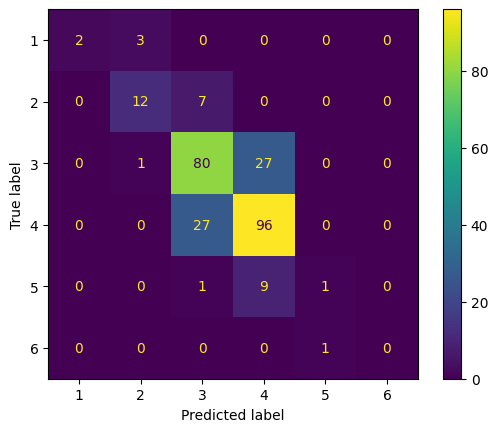

In [21]:
# compute the confusion matrix using the actual scores of the essays in the test set and the model predictions
cm = confusion_matrix(y_test, predictions)
# first parameter is the confusion matrix computed
# display_labels parameter defines the list of possible labels (from 1 to 6), since essay scores range from 1-6
disp = ConfusionMatrixDisplay(cm, display_labels=[1,2,3,4,5,6])

# display the confusion matrix
disp.plot()

In the confusion matrix, the value in row i column j represents the number of essays for which the model predicted a score of j but actually has a score of i. For example, the value in row 1 column 2 is 3. This means that there are 3 essays for which the model predicted a score of 2 but in actuality, they had a score of 1.

The most important thing to notice in the grid above are the values in the diagonal from the upper left to the lower right as they represent the number of predictions that are correct, the brighter the square the higher the frequency. Ideally this diagonal should be lit up. Notice here that aside from row 3 column 3, and row 4 column 4, all the other squares on this diagonal are quite dark however this does not necessarily mean that the model's performance is poor, in this case it simply means that there are comparably few essays with scores less than 3 or more than 4. For example, if we total up the values in row 6 we can see that there is only 1 essay that has a score of 6!

Of course this means that values *not* on the diagonal should ideally be very dark as they represent wrong predictions.

Therefore since the (middle of the) diagonal is well-lit and the squares that are *not* on the diagonal are mostly dark we can get some sense that the model's performance is quite good. We can reinforce this by testing the model with the QWK metric.

### &emsp;&emsp;QWK

The Quadratic Weighted Kappa (QWK) is a metric that is used to evaluate the amount of agreement between the model or algorithm's predictions and the actual labels and tries to account for random chance by adjusting for the probability that the model's prediction agrees with the actual label "by chance". It does this by assuming that there is a predetermined proportion of objects assigned to each label. Most notably this metric is used to score submissions on *kaggle* (Arora, 2019).

The possible scores resulting from this metric ranges from a minimum of -1.0 to a maximum score of 1.0, and the aim is to get as close to 1.0 as possible (Arora, 2019).

We can compute the Quadratic Weighted Kappa metric by using the *cohen_kappa_score()* function in the *sklearn.metrics* module with the *weights* parameter set as 'quadratic'. In the code block below we are comparing the model's predictions with the actual scores (labels) to compute a score denoting the model's accuracy.

In [22]:
# display the QWK for the model predictions
cohen_kappa_score(y_test, predictions, weights='quadratic')

0.7133519059590949

The highest possible score is 1.0 which denotes that the model's predictions are exactly the same as the actual labels, a score of 0.0 indicates that the model's predictions which do agree with the actual labels simply match "by chance". On the other hand, a score of -1.0 indicates that the model's predictions are as far away as possible from the actual labels (Arora, 2019).

Typically, a score of 0.6+ is considered very good (Arora, 2019), therefore since we can see from the output of the code above that our model has a score of 0.71 we can now be confident that it is quite a good model.

## &emsp; Using the SVM Model

Here I used the SVM model to output the predictions of the unlabeled data *'essay_features.csv'* into a formatted CSV file

### &emsp; Reading File

First we need to read the *'essay_features.csv'* file and convert it to a DataFrame by using the *.read_csv()* function from the *pandas* library

In [23]:
kaggle_data = pd.read_csv('/content/sample_data/essay_features.csv')

We can display the data that we have read to get a glimpse at the data. The most notable thing here is that it differs from the original dataset as it is missing the score column, this is because we are meant to fill this column with the predictions of our trained model.

In [24]:
kaggle_data

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,1151,2404,467,16,10,0,5.147752,22,0,21.227273,462.987069,0.991407,200,0.428266,113,0.241970,529,519,4
1328,1015,1182,241,0,14,0,4.904564,16,0,15.062500,238.655462,0.990272,94,0.390041,67,0.278008,293,283,3
1329,1345,1814,363,5,11,0,4.997245,13,3,27.923077,362.329640,0.998153,170,0.468320,107,0.294766,427,415,3
1330,344,1427,287,5,8,0,4.972125,13,1,22.076923,284.657277,0.991837,144,0.501742,83,0.289199,323,312,3


### &emsp; Preprocessing

Since we selected specific features when training the SVM model we need to do the same here, i.e. we need to extract the values from the same columns that were used for training the model.

In [25]:
# specify the column headers of the features we want to keep
selected_cols = ['unstemmed', 'stemmed', 'chars', 'POS', 'words', 'prompt_words', 'synonym_words', 'commas']
# extract the values only from the selected columns
selected_features = kaggle_data[selected_cols].values

Scale the data using the same scaler (MinMaxScaler()) that was used to train the model

In [26]:
# scale the data with the same scaler used for the training and test set
X_kaggle = scaler.transform(selected_features)

### &emsp; Predicting

Make the predictions using the SVM model and display these predictions

In [27]:
kaggle_predictions = opt_svm.predict(X_kaggle)

In [28]:
kaggle_predictions

array([4, 3, 4, ..., 3, 3, 4])

### &emsp;Output to CSV file

To write the results to a csv file, we must first create a DataFrame with the appropriate format:
- Columns (2 columns):
    - *essayid*: the unique id for that essay
    - *score*: the score for that essay
- 200 lines:
    - 1 header containing the column names
    - 199 entries of essay-score pairs
    
To do this we can extract the essay ids from the *kaggle_data* DataFrame, and append a new column *score* filled with the model's predictions for each essay.

In [29]:
# extract the essayid column from kaggle_data
df_predictions = kaggle_data["essayid"]
# convert the Series to a DataFrame
df_predictions = df_predictions.to_frame()
# create new column score and fill it with the model's predictions
df_predictions["score"] = pd.Series(kaggle_predictions)

# display the DataFrame
df_predictions

,essayid,score
0,1457,4
1,503,3
2,253,4
3,107,3
4,1450,4
...,...,...
1327,1151,4
1328,1015,3
1329,1345,3
1330,344,3


## &emsp;Using a Random Forest Classifer

Unlike the SVM, the random forest classifier performs better when provided with all the features therefore we are not going to do feature selection here except for excluding the *essayid* column which simply provides the unique id of the essay and is not an indication of the essay's contents or quality thus it has no bearing on the score of the essays.

In [30]:
all_features = essay_data.iloc[:, 1:-1].values

### &emsp;Oversampling

An interesting thing to note about the data is that there is a large imbalance between the frequency of the scores. The majority of essays are scored either a 3 or a 4. We can see this by using the *Counter* class from the *collections* library which counts the number of essays for each score.

In [31]:
Counter(label)

Counter({4: 583, 3: 557, 2: 110, 1: 18, 5: 60, 6: 4})

From this we can see that there are 583 essays that scored a 4 which makes up **43.8%** of the total essays whereas there are only 4 essays with a score of 6, this amounts to **0.45%** of total essays. This means that we are dealing with an imbalanced classification problem which is a classification problem in which the distribution of examples across the classes is skewed. This results in models having difficulty predicting these minority classes thus resulting in poorer performance overall.

To combat this we can oversample these minority classes by using the Syntethic Minority Oversampling Technique which synthesizes new examples for these minority classes from existing ones. For this, we can use the *SMOTE* class from the *imblearn.over_sampling* module and resample the dataset from the original dataset.

In [32]:
# k_neighbors is the number of nearest neighbours to construct syntethic samples
# set random_state to an integer so that output is reproducible
oversample = SMOTE(k_neighbors = 1, random_state = 209476)

# resample the dataset
features_over, label_over = oversample.fit_resample(all_features, label)

Split the oversampled dataset into the training and test set with the ratio 80:20

In [33]:
# test_size parameter determines the proportion of the test set overt the entire dataset
# an integer is passed in random_state to ensure reproducible output
X_train, X_test, y_train, y_test = train_test_split(features_over, label_over, test_size=0.2, random_state=42)

Scale the feature values using the *StandardScaler()* function from the *sklearn.preprocessing* module

In [34]:
# define the scaler as the StandardScaler()
scaler = StandardScaler()

# fit the scaler to the training data which computes the mean and standard deviation of every feature in X_train
# then we transform X_train to scale the data according to the computed mean and standard deviation
X_train = scaler.fit_transform(X_train)
# Here we transform X_test using the mean and standard deviation of the corresponding features in X_train
X_test = scaler.transform(X_test)

### &emsp; Random Forest Classifier

Create the random forest classifier and use GridSearchCV to search for the best parameters for this model based on the training set. Here the most important parameters are:
- n_estimators: the number of trees to use
- max_depth: the maximum depth of the tree

The following block of code should only take ~5-15 seconds

In [35]:
# instantiate the RandomForestClassifier
# provide an integer for random_state so that the output is reproducible
rfc = RandomForestClassifier(random_state = 42)

# provide list of possible parameter values
parameters={'n_estimators' : [5, 10, 15, 20],
            'max_depth' : [2, 5, 7, 9]}

# in the first parameter the estimator for which we want to test out the parameter combinations is passed in
# In the second parameter, try every combination of parameter values for the provided estimator (rfc)
# verbose parameter controls its verbosity, a value of 1 just displays the total number of combinations
opt_rfc = GridSearchCV(rfc, parameters, verbose=10)
# fit the rfc to the training set and try all the parameter combinations to find the best one
opt_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START max_depth=2, n_estimators=5................................
[CV 1/5; 1/16] END .max_depth=2, n_estimators=5;, score=0.613 total time=   0.0s
[CV 2/5; 1/16] START max_depth=2, n_estimators=5................................
[CV 2/5; 1/16] END .max_depth=2, n_estimators=5;, score=0.623 total time=   0.0s
[CV 3/5; 1/16] START max_depth=2, n_estimators=5................................
[CV 3/5; 1/16] END .max_depth=2, n_estimators=5;, score=0.632 total time=   0.0s
[CV 4/5; 1/16] START max_depth=2, n_estimators=5................................
[CV 4/5; 1/16] END .max_depth=2, n_estimators=5;, score=0.578 total time=   0.0s
[CV 5/5; 1/16] START max_depth=2, n_estimators=5................................
[CV 5/5; 1/16] END .max_depth=2, n_estimators=5;, score=0.623 total time=   0.0s
[CV 1/5; 2/16] START max_depth=2, n_estimators=10...............................
[CV 1/5; 2/16] END max_depth=2, n_estimators=10;

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 5, 7, 9],
                         'n_estimators': [5, 10, 15, 20]},
             verbose=10)

After the model has been fitted to the training set and the best parameters have been chosen, we can see which of the parameter values had the best result by accessing the *best_params_* attribute of GridSearchCV

In [36]:
opt_rfc.best_params_

{'max_depth': 9, 'n_estimators': 20}

In order to evaluate the performance of the random forest classifier, we must first use it to predict the scores for the essays in the test set by calling the *.predict()* method of the model on *X_test*

In [37]:
opt_rfc_predictions = opt_rfc.predict(X_test)

Now we can compute and display the confusion matrix to visualize the performance of the model. Note here that totaling the values along a row (which gives the total number of essays with that score) might give a different total than the first confusion matrix, this is the result of the oversampling.

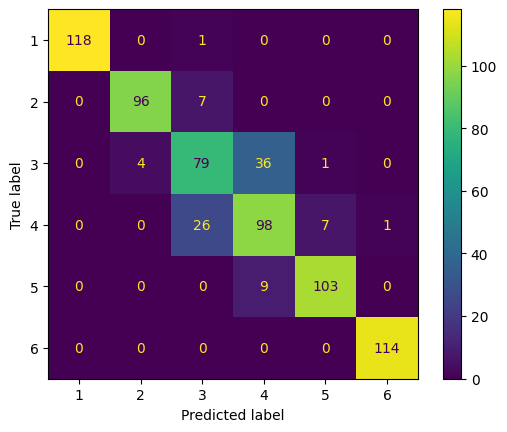

In [38]:
# compute the confusion matrix using the actual scores of the essays in the test set and the model predictions
cm = confusion_matrix(y_test, opt_rfc_predictions)
# first parameter is the confusion matrix computed
# display_labels parameter defines the list of possible labels (from 1 to 6), since essay scores range from 1-6
disp = ConfusionMatrixDisplay(cm, display_labels=[1,2,3,4,5,6])

# display the confusion matrix
disp.plot()

We can see that the diagonal (upper-left to bottom-right) is lit up and other squares *not* on the diagonal are dark, this means that most of the model's predictions are correct and therefore the model seems to perform quite well. We can reinforce this notion by displaying the QWK score of the model.

In [39]:
print(cohen_kappa_score(y_test, opt_rfc_predictions, weights='quadratic'))

0.9747343352878785


We can see that this score is a huge improvement over the score we obtained for our SVM (0.713) so we have successfully created a very accurate model.

<p style="background-color:#F1C40F;color:black;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #F1C40F;">Thank You😄!!!!!!</p>